In [1]:
import pandas as pd

df = pd.read_csv('merged_recipe_price_nodupl.csv')

df

,title,ingredient,amount,unit,matched_product,match_score,PRODUCT_NAME,BRAND,PRICE_RETAIL,PRICE_CURRENT,PRODUCT_SIZE
0,No-Bake Nut Cookies,brown sugar,1.00,c,johnsonville brown sugar honey breakfast saus...,100.0,Johnsonville Brown Sugar & Honey Breakfast Sau...,johnsonville,3.98,3.98,12.0
1,No-Bake Nut Cookies,milk,0.50,c,russell stover sugar free milk chocolate pecan...,100.0,Russell Stover Sugar Free Milk Chocolate Pecan...,russell stover,2.18,2.18,3.0
2,No-Bake Nut Cookies,vanilla,0.50,tsp,starbucks doubleshot energy vanilla coffee ene...,100.0,Starbucks Doubleshot Energy Vanilla Coffee Ene...,starbucks,2.98,2.98,15.0
3,No-Bake Nut Cookies,nuts,0.50,c,emerald nuts cashews almonds with dried cranb...,100.0,"Emerald Nuts, Cashews & Almonds with Dried Cra...",emerald,5.24,5.24,6.0
4,No-Bake Nut Cookies,butter,2.00,tbsp,crisco gluten free butter flavor all vegetable...,100.0,"Crisco Gluten Free, Butter Flavor, All Vegetab...",crisco,7.70,7.70,20.0
...,...,...,...,...,...,...,...,...,...,...,...
139810,Pork Chop 'N Potato Bake,sour cream,0.50,c,prices grade a red and green chile sour cream ...,100.0,Price's Grade A Red And Green Chile Sour Cream...,price's,3.12,3.12,12.0
139811,Pork Chop 'N Potato Bake,ground black pepper,0.25,tsp,great value ground black pepper 3 oz,100.0,"Great Value Ground Black Pepper, 3 oz",great value,3.12,3.12,3.0
139812,Pork Chop 'N Potato Bake,potatoes,NaN,NaN,bob evans original mashed potatoes refrigerate...,100.0,"Bob Evans Original Mashed Potatoes, Refrigerat...",bob evans,3.64,3.64,24.0
139813,Pork Chop 'N Potato Bake,Cheddar cheese,4.00,oz,sensible portions glutenfree sea salt zesty ra...,100.0,"Sensible Portions Gluten-Free Sea Salt, Zesty ...",sensible portions,7.68,7.68,0.0


# Cleaning the dataset

In [2]:
df.dropna(inplace=True)
df.reset_index(inplace=True, drop=True)

In [3]:
df = df[df['match_score'] == 100]
df.reset_index(inplace=True, drop=True)

In [4]:
df = df[df['PRODUCT_SIZE'] != 0]
df.reset_index(inplace=True, drop=True)

# Calulate cost per serving

In [5]:
df['Price_per_ingredient'] = df['PRICE_CURRENT']/df['PRODUCT_SIZE']

In [6]:
df['Current_price_amount_ingredient'] = df['amount']*df['Price_per_ingredient']

In [7]:
df[df['title'] == 'No-Bake Nut Cookies']

,title,ingredient,amount,unit,matched_product,match_score,PRODUCT_NAME,BRAND,PRICE_RETAIL,PRICE_CURRENT,PRODUCT_SIZE,Price_per_ingredient,Current_price_amount_ingredient
0,No-Bake Nut Cookies,brown sugar,1.0,c,johnsonville brown sugar honey breakfast saus...,100.0,Johnsonville Brown Sugar & Honey Breakfast Sau...,johnsonville,3.98,3.98,12.0,0.331667,0.331667
1,No-Bake Nut Cookies,milk,0.5,c,russell stover sugar free milk chocolate pecan...,100.0,Russell Stover Sugar Free Milk Chocolate Pecan...,russell stover,2.18,2.18,3.0,0.726667,0.363333
2,No-Bake Nut Cookies,vanilla,0.5,tsp,starbucks doubleshot energy vanilla coffee ene...,100.0,Starbucks Doubleshot Energy Vanilla Coffee Ene...,starbucks,2.98,2.98,15.0,0.198667,0.099333
3,No-Bake Nut Cookies,nuts,0.5,c,emerald nuts cashews almonds with dried cranb...,100.0,"Emerald Nuts, Cashews & Almonds with Dried Cra...",emerald,5.24,5.24,6.0,0.873333,0.436667
4,No-Bake Nut Cookies,butter,2.0,tbsp,crisco gluten free butter flavor all vegetable...,100.0,"Crisco Gluten Free, Butter Flavor, All Vegetab...",crisco,7.70,7.70,20.0,0.385000,0.770000


# Dictionary with Cost for each recipe

In [8]:
sum_dict = df.groupby('title')['Current_price_amount_ingredient'].sum().to_dict()

sum_dict


{'"24 Hour Layered Salad"': 1.2162499999999998,
 '"A B C" Sandwich': 0.8823214285714286,
 '"All-American" Strawberry Pie': 3.696833333333333,
 '"Arni Psito" - Roast Leg Of Lamb': 83.21784338235294,
 '"B" Cookies': 5.613,
 '"Berry" Delicious Fruit Shortcake': 30.763319444444445,
 '"Bev\'S Cocoa"': 26.461333333333336,
 '"Bonnie\'S" Sweet Potato Gook': 8.94951515151515,
 '"Buch\'Ta"': 11.495319444444444,
 '"Buckeyes"': 3.2461052631578946,
 '"Bumsteads"': 6.306185185185186,
 '"Carolina Housewife" Wedding Cake Of 1850': 65.58807393939394,
 '"Cheaters" Mexican Bake': 7.574,
 '"Cholives" Puff Appetizers': 4.35575,
 '"Cobbler Pie"': 3.0304166666666665,
 '"Coffee Float"': 0.25261904761904763,
 '"Cold Oven" Lemon Pound Cake': 8.493916666666667,
 '"Company" Bread': 5.0075,
 '"Cowbelle" Special': 5.835999999999999,
 '"Date Ball" Cookies': 3.0288145161290325,
 '"Delicious" Taco Soup': 0.226875,
 '"Delightfully Quick Stir-Fry"': 5.682812500000001,
 '"Diples" - Honey Ripples': 5.700666666666667,
 '"D

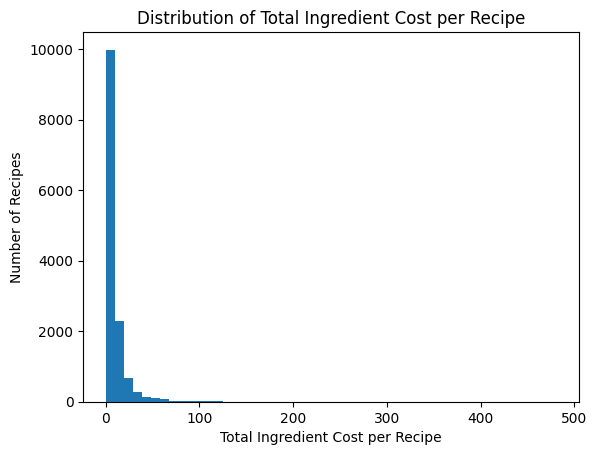

In [9]:
from matplotlib import pyplot as plt

plt.hist(list(sum_dict.values()), bins=50)
plt.xlabel('Total Ingredient Cost per Recipe')
plt.ylabel('Number of Recipes')
plt.title('Distribution of Total Ingredient Cost per Recipe')
plt.show()

In [10]:
df_data = df.copy(deep=True)

# Defining Functions to Extract Nutrition information

In [15]:
import os, time, functools, requests, pandas as pd

# ---------- CONFIG ----------
FDC_API_KEY = os.getenv("FDC_API_KEY")  # put your key in env or inline: "YOUR_KEY"
FDC_SEARCH_URL = "https://api.nal.usda.gov/fdc/v1/foods/search"
FDC_FOOD_URL   = "https://api.nal.usda.gov/fdc/v1/food/"
OFF_SEARCH_URL = "https://world.openfoodfacts.org/cgi/search.pl"

# Common cup→gram densities (approx; tweak as needed)
CUP_GRAMS = {
    "milk": 240.0,
    "brown sugar": 220.0,        # packed
    "granulated sugar": 200.0,
    "sugar": 200.0,
    "butter": 227.0,
    "flour": 120.0,              # all-purpose, spooned
    "peanut butter": 258.0,
    "rolled oats": 80.0,
}

def _to_grams(amount, unit, ingredient_hint=None):
    """Convert amount+unit to grams where possible. Returns grams or None."""
    if amount is None or pd.isna(amount):
        return None
    unit = (str(unit) or "").strip().lower()
    if unit in {"g","gram","grams"}:
        return float(amount)
    if unit in {"kg"}:
        return float(amount) * 1000.0
    if unit in {"oz","ounce","ounces"}:
        return float(amount) * 28.349523125
    if unit in {"lb","pound","pounds"}:
        return float(amount) * 453.59237
    if unit in {"ml"}:
        return float(amount) * 1.0  # ~water density
    if unit in {"c","cup","cups"}:
        hint = (ingredient_hint or "").strip().lower()
        # try exact match, then loose contains
        if hint in CUP_GRAMS:
            return float(amount) * CUP_GRAMS[hint]
        for k,v in CUP_GRAMS.items():
            if k in hint:
                return float(amount) * v
        # default fallback ~240 g/cup (water-like)
        return float(amount) * 240.0
    if unit in {"tbsp","tablespoon","tablespoons"}:
        return float(amount) * 15.0
    if unit in {"tsp","teaspoon","teaspoons"}:
        return float(amount) * 5.0
    # unknown unit (e.g., 'link', 'bar', 'piece'): return None -> we’ll try per-serving math later
    return None

# ---------- API HELPERS ----------
def _norm_from_fdc(food):
    """Return dict with per_100g if possible, otherwise per_serving with grams if available."""
    # Prefer labelNutrients + serving info (Branded)
    ln = food.get("labelNutrients") or {}
    serving_g = None
    if food.get("servingSize") and food.get("servingSizeUnit"):
        if str(food["servingSizeUnit"]).lower().startswith(("g","gram")):
            serving_g = float(food["servingSize"])
        elif str(food["servingSizeUnit"]).lower() in {"oz","ounce","ounces"}:
            serving_g = float(food["servingSize"]) * 28.349523125

    def _lnv(key):
        x = ln.get(key) or {}
        return x.get("value")

    per_serv = None
    if ln:
        per_serv = {
            "kcal": _lnv("calories"),
            "protein_g": _lnv("protein"),
            "fat_g": _lnv("fat"),
            "carbs_g": _lnv("carbohydrates"),
            "serving_g": serving_g,
        }

    # Generic foods: foodNutrients (per 100 g typical)
    per_100g = {}
    if not per_serv:
        fns = food.get("foodNutrients") or []
        # hunt by nutrient name
        def pick(names):
            for n in fns:
                name = (n.get("nutrient") or {}).get("name") or n.get("nutrientName","")
                if any(s in str(name).lower() for s in names):
                    return n.get("amount")
            return None
        per_100g = {
            "kcal": pick(["energy"]),
            "protein_g": pick(["protein"]),
            "fat_g": pick(["total lipid","fat"]),
            "carbs_g": pick(["carbohydrate"]),
        }

    return {
        "match_name": food.get("description"),
        "brand": food.get("brandOwner"),
        "per_100g": per_100g if any(v is not None for v in per_100g.values()) else None,
        "per_serving": per_serv if per_serv and any(v is not None for k,v in per_serv.items() if k!="serving_g") else None,
        "provider": "usda_fdc",
    }

@functools.lru_cache(maxsize=4096)
def usda_lookup(query):
    if not FDC_API_KEY:
        return None
    params = {"api_key": FDC_API_KEY, "query": query, "pageSize": 1, "sortBy": "score",
              "dataType": "Branded,SR Legacy,Survey (FNDDS)"}
    r = requests.get(FDC_SEARCH_URL, params=params, timeout=20)
    if r.status_code != 200 or not r.json().get("foods"):
        return None
    fdc_id = r.json()["foods"][0]["fdcId"]
    rr = requests.get(FDC_FOOD_URL + str(fdc_id), params={"api_key": FDC_API_KEY}, timeout=20)
    if rr.status_code != 200:
        return None
    return _norm_from_fdc(rr.json())

@functools.lru_cache(maxsize=4096)
def off_lookup(query):
    params = {"search_terms": query, "search_simple": 1, "json": 1, "page_size": 1}
    r = requests.get(OFF_SEARCH_URL, params=params, timeout=20)
    if r.status_code != 200:
        return None
    prods = (r.json() or {}).get("products") or []
    if not prods: return None
    p = prods[0]
    nutr = p.get("nutriments") or {}
    per_100g = {
        "kcal": nutr.get("energy-kcal_100g"),
        "protein_g": nutr.get("proteins_100g"),
        "fat_g": nutr.get("fat_100g"),
        "carbs_g": nutr.get("carbohydrates_100g"),
    }
    serving_g = nutr.get("serving_size")  # often messy text; OFF also exposes *_serving values
    return {
        "match_name": p.get("product_name") or p.get("generic_name"),
        "brand": p.get("brands"),
        "per_100g": per_100g if any(v is not None for v in per_100g.values()) else None,
        "per_serving": {
            "kcal": nutr.get("energy-kcal_serving"),
            "protein_g": nutr.get("proteins_serving"),
            "fat_g": nutr.get("fat_serving"),
            "carbs_g": nutr.get("carbohydrates_serving"),
            "serving_g": None,  # OFF rarely gives clean grams here
        } if any(nutr.get(k) is not None for k in ["energy-kcal_serving","proteins_serving","fat_serving","carbohydrates_serving"]) else None,
        "provider": "open_food_facts",
    }

def resolve_food(query):
    res = usda_lookup(query)
    if res: return res
    return off_lookup(query)

def _per_g_from(res):
    """Return (kcal_g, protein_g_g, fat_g_g, carbs_g_g) if we can compute per-gram numbers."""
    if res.get("per_100g"):
        p = res["per_100g"]
        return tuple(None if p[k] is None else float(p[k])/100.0 for k in ["kcal","protein_g","fat_g","carbs_g"])
    if res.get("per_serving") and res["per_serving"].get("serving_g"):
        p = res["per_serving"]
        g = float(p["serving_g"])
        if g > 0:
            return tuple(None if p[k] is None else float(p[k])/g for k in ["kcal","protein_g","fat_g","carbs_g"])
    return (None, None, None, None)

def _totals_from_amount(res, amount, unit, ingredient_hint=None):
    grams = _to_grams(amount, unit, ingredient_hint)
    kcal_g, pr_g, fa_g, ca_g = _per_g_from(res)
    # Case 1: we know grams & per-gram nutrients
    if grams is not None and any(x is not None for x in (kcal_g, pr_g, fa_g, ca_g)):
        return {
            "basis": f"{grams:.1f} g",
            "kcal": None if kcal_g is None else grams * kcal_g,
            "protein_g": None if pr_g   is None else grams * pr_g,
            "fat_g": None if fa_g       is None else grams * fa_g,
            "carbs_g": None if ca_g     is None else grams * ca_g,
        }
    # Case 2: fall back to per-serving if unit likely means "servings"
    if res.get("per_serving") and str(unit).lower() in {"serving","servings","srv","piece","link","bar"}:
        p = res["per_serving"]
        return {
            "basis": f"{amount} serving(s)",
            "kcal": None if p.get("kcal") is None else float(amount)*float(p["kcal"]),
            "protein_g": None if p.get("protein_g") is None else float(amount)*float(p["protein_g"]),
            "fat_g": None if p.get("fat_g") is None else float(amount)*float(p["fat_g"]),
            "carbs_g": None if p.get("carbs_g") is None else float(amount)*float(p["carbs_g"]),
        }
    # Unknown
    return {"basis": None, "kcal": None, "protein_g": None, "fat_g": None, "carbs_g": None}

def build_query(row):
    """Compose a search query from your DF columns."""
    brand = str(row.get("BRAND") or "").strip()
    pname = str(row.get("PRODUCT_NAME") or "").strip()
    size  = row.get("PRODUCT_SIZE")
    if brand or pname:
        q = f"{brand} {pname}".strip()
        if pd.notna(size):
            q = f"{q} {size} oz"
        return q
    # fallback to matched_product or ingredient
    mp = str(row.get("matched_product") or "").strip()
    if mp:
        return mp
    ing = str(row.get("ingredient") or "").strip()
    return ing

def enrich_nutrition(df,
                     amount_col="amount",
                     unit_col="unit",
                     ingredient_col="ingredient",
                     sleep_s=0.25):
    out_rows = []
    for _, row in df.iterrows():
        q = build_query(row)
        res = resolve_food(q)
        totals = _totals_from_amount(
            res or {},
            amount=row.get(amount_col),
            unit=row.get(unit_col),
            ingredient_hint=row.get(ingredient_col),
        )
        out_rows.append({
            "query_used": q,
            "provider": (res or {}).get("provider"),
            "matched_name": (res or {}).get("match_name"),
            "matched_brand": (res or {}).get("brand"),
            "basis": totals["basis"],
            "kcal": totals["kcal"],
            "protein_g": totals["protein_g"],
            "fat_g": totals["fat_g"],
            "carbs_g": totals["carbs_g"],
        })
        time.sleep(sleep_s)  # polite throttling; tune to your key/plan
    return pd.concat([df.reset_index(drop=True), pd.DataFrame(out_rows)], axis=1)


In [ ]:
import os, time, functools, requests, pandas as pd
from requests.adapters import HTTPAdapter
from urllib3.util.retry import Retry

# ---------- RETRYING SESSION ----------
def make_session(total=3, backoff=0.5, status_forcelist=(429, 500, 502, 503, 504), timeout=10):
    sess = requests.Session()
    retry = Retry(total=total, backoff_factor=backoff,
                  status_forcelist=status_forcelist, allowed_methods=False, raise_on_status=False)
    adapter = HTTPAdapter(max_retries=retry, pool_connections=50, pool_maxsize=50)
    sess.mount("http://", adapter)
    sess.mount("https://", adapter)
    sess.request_timeout = timeout  # custom attribute we’ll read below
    return sess

SESSION = make_session()

def _get(url, **kwargs):
    timeout = kwargs.pop("timeout", SESSION.request_timeout)
    return SESSION.get(url, timeout=timeout, **kwargs)

# ---------- CONFIG ----------
FDC_API_KEY = os.getenv("FDC_API_KEY")  # or set inline: FDC_API_KEY = "YOUR_KEY"
FDC_SEARCH_URL = "https://api.nal.usda.gov/fdc/v1/foods/search"
FDC_FOOD_URL   = "https://api.nal.usda.gov/fdc/v1/food/"
OFF_SEARCH_URL = "https://world.openfoodfacts.org/cgi/search.pl"


# ---------- API HELPERS (patched to use _get and trap timeouts) ----------
def _norm_from_fdc(food):
    ln = food.get("labelNutrients") or {}
    serving_g = None
    if food.get("servingSize") and food.get("servingSizeUnit"):
        u = str(food["servingSizeUnit"]).lower()
        if u.startswith(("g","gram")):
            serving_g = float(food["servingSize"])
        elif u in {"oz","ounce","ounces"}:
            serving_g = float(food["servingSize"]) * 28.349523125

    def _lnv(key): return (ln.get(key) or {}).get("value")

    per_serv = None
    if ln:
        per_serv = {
            "kcal": _lnv("calories"),
            "protein_g": _lnv("protein"),
            "fat_g": _lnv("fat"),
            "carbs_g": _lnv("carbohydrates"),
            "serving_g": serving_g,
        }

    fns = food.get("foodNutrients") or []
    def pick(names):
        for n in fns:
            name = (n.get("nutrient") or {}).get("name") or n.get("nutrientName","")
            if any(s in str(name).lower() for s in names):
                return n.get("amount")
        return None

    per_100g = {
        "kcal": pick(["energy"]),
        "protein_g": pick(["protein"]),
        "fat_g": pick(["total lipid","fat"]),
        "carbs_g": pick(["carbohydrate"]),
    }

    return {
        "match_name": food.get("description"),
        "brand": food.get("brandOwner"),
        "per_100g": per_100g if any(v is not None for v in per_100g.values()) else None,
        "per_serving": per_serv if per_serv and any(v is not None for k,v in per_serv.items() if k!="serving_g") else None,
        "provider": "usda_fdc",
    }

@functools.lru_cache(maxsize=4096)
def usda_lookup(query):
    if not FDC_API_KEY:
        return None
    try:
        params = {"api_key": FDC_API_KEY, "query": query, "pageSize": 1, "sortBy": "score",
                  "dataType": "Branded,SR Legacy,Survey (FNDDS)"}
        r = _get(FDC_SEARCH_URL, params=params)
        if r.status_code != 200 or not (r.json().get("foods") or []):
            return None
        fdc_id = r.json()["foods"][0]["fdcId"]
        rr = _get(FDC_FOOD_URL + str(fdc_id), params={"api_key": FDC_API_KEY})
        if rr.status_code != 200:
            return None
        return _norm_from_fdc(rr.json())
    except (requests.Timeout, requests.ConnectionError):
        return None

@functools.lru_cache(maxsize=4096)
def off_lookup(query):
    try:
        params = {"search_terms": query, "search_simple": 1, "json": 1, "page_size": 1}
        r = _get(OFF_SEARCH_URL, params=params, timeout=8)  # shorter timeout
        if r.status_code != 200:
            return None
        prods = (r.json() or {}).get("products") or []
        if not prods: return None
        p = prods[0]
        nutr = p.get("nutriments") or {}
        per_100g = {
            "kcal": nutr.get("energy-kcal_100g"),
            "protein_g": nutr.get("proteins_100g"),
            "fat_g": nutr.get("fat_100g"),
            "carbs_g": nutr.get("carbohydrates_100g"),
        }
        return {
            "match_name": p.get("product_name") or p.get("generic_name"),
            "brand": p.get("brands"),
            "per_100g": per_100g if any(v is not None for v in per_100g.values()) else None,
            "per_serving": None,
            "provider": "open_food_facts",
        }
    except (requests.Timeout, requests.ConnectionError):
        return None

def resolve_food(query, allow_off=True):
    res = usda_lookup(query)
    if res: return res
    if allow_off:
        return off_lookup(query)
    return None

# ... keep _per_g_from, _totals_from_amount, build_query ...

def enrich_nutrition(df,
                     amount_col="amount",
                     unit_col="unit",
                     ingredient_col="ingredient",
                     sleep_s=0.15,
                     allow_off=False):  # default OFF disabled to avoid timeouts
    out_rows = []
    for _, row in df.iterrows():
        q = build_query(row)
        res = resolve_food(q, allow_off=allow_off)
        totals = _totals_from_amount(
            res or {},
            amount=row.get(amount_col),
            unit=row.get(unit_col),
            ingredient_hint=row.get(ingredient_col),
        )
        out_rows.append({
            "query_used": q,
            "provider": (res or {}).get("provider"),
            "matched_name": (res or {}).get("match_name"),
            "matched_brand": (res or {}).get("brand"),
            "basis": totals["basis"],
            "kcal": totals["kcal"],
            "protein_g": totals["protein_g"],
            "fat_g": totals["fat_g"],
            "carbs_g": totals["carbs_g"],
        })
        time.sleep(sleep_s)
    return pd.concat([df.reset_index(drop=True), pd.DataFrame(out_rows)], axis=1)


# Extracting nutrition information

In [ ]:
# Make sure your key is loaded (either env or inline)
os.environ["FDC_API_KEY"] = "zuF3U5RTK9Yfjcg3baeH6bE6JXIrJJqcs69dL0im"  # example key; replace with your own

# Quick sanity check: print the first/last 4 chars so you know it's set
print("FDC key loaded:", os.getenv("FDC_API_KEY")[:4] + "..." + os.getenv("FDC_API_KEY")[-4:])

# Enrich using USDA only (OFF disabled)
list_df_enriched = []
for i in range(df_data.shape[0]//500 + 1):
    print(f"Processing batch {i+1}...")
    df_enriched = enrich_nutrition(df_data[i*500:(i+1)*500], allow_off=False, sleep_s=0.05)
    # df_enriched.to_csv(f"df_enriched_batch_{i+1}.csv", index=False)
    list_df_enriched.append(df_enriched)
df_enriched = pd.concat(list_df_enriched, ignore_index=True)
# df_enriched.head()


FDC key loaded: zuF3...L0im
Processing batch 1...
Processing batch 2...
Processing batch 3...
Processing batch 4...
Processing batch 5...
Processing batch 6...
Processing batch 7...
Processing batch 8...
Processing batch 9...
Processing batch 10...
Processing batch 11...
Processing batch 12...
Processing batch 13...
Processing batch 14...
Processing batch 15...
Processing batch 16...
Processing batch 17...
Processing batch 18...
Processing batch 19...
Processing batch 20...
Processing batch 21...
Processing batch 22...
Processing batch 23...
Processing batch 24...
Processing batch 25...
Processing batch 26...
Processing batch 27...
Processing batch 28...
Processing batch 29...
Processing batch 30...
Processing batch 31...
Processing batch 32...
Processing batch 33...
Processing batch 34...
Processing batch 35...
Processing batch 36...
Processing batch 37...
Processing batch 38...
Processing batch 39...
Processing batch 40...
Processing batch 41...
Processing batch 42...
Processing batc

In [29]:
df_enriched_filtered = df_enriched.dropna()

In [36]:
df_enriched_filtered

,title,ingredient,amount,unit,matched_product,match_score,PRODUCT_NAME,BRAND,PRICE_RETAIL,PRICE_CURRENT,...,Current_price_amount_ingredient,query_used,provider,matched_name,matched_brand,basis,kcal,protein_g,fat_g,carbs_g
0,No-Bake Nut Cookies,brown sugar,1.00,c,johnsonville brown sugar honey breakfast saus...,100.0,Johnsonville Brown Sugar & Honey Breakfast Sau...,johnsonville,3.98,3.98,...,0.331667,johnsonville Johnsonville Brown Sugar & Honey ...,usda_fdc,"JOHNSONVILLE, SUMMER SAUSAGE","Johnsonville Sausage, L.L.C.",220.0 g,706.200000,39.292000,58.938000,3.938000
1,No-Bake Nut Cookies,milk,0.50,c,russell stover sugar free milk chocolate pecan...,100.0,Russell Stover Sugar Free Milk Chocolate Pecan...,russell stover,2.18,2.18,...,0.363333,russell stover Russell Stover Sugar Free Milk ...,usda_fdc,"RUSSELL STOVER, PECAN DELIGHTS",Russell Stover Candies Inc.,120.0 g,600.000000,5.460000,38.184000,70.908000
2,No-Bake Nut Cookies,vanilla,0.50,tsp,starbucks doubleshot energy vanilla coffee ene...,100.0,Starbucks Doubleshot Energy Vanilla Coffee Ene...,starbucks,2.98,2.98,...,0.099333,starbucks Starbucks Doubleshot Energy Vanilla ...,usda_fdc,"STARBUCKS, DOUBLESHOT ENERGY, ENERGY COFFEE BE...",NO MANUFACTURER,2.5 g,1.175000,0.000000,0.014000,0.191750
3,No-Bake Nut Cookies,nuts,0.50,c,emerald nuts cashews almonds with dried cranb...,100.0,"Emerald Nuts, Cashews & Almonds with Dried Cra...",emerald,5.24,5.24,...,0.436667,"emerald Emerald Nuts, Cashews & Almonds with D...",usda_fdc,"Emerald Nuts, Natural Almonds, 100 Calorie Pac...",Snyder's-Lance INC.,120.0 g,685.200000,27.432000,13.716000,27.432000
4,No-Bake Nut Cookies,butter,2.00,tbsp,crisco gluten free butter flavor all vegetable...,100.0,"Crisco Gluten Free, Butter Flavor, All Vegetab...",crisco,7.70,7.70,...,0.770000,"crisco Crisco Gluten Free, Butter Flavor, All ...",usda_fdc,"CRISCO SHORTENING STICKS, 3 COUNT, 20 OZ","B&G Foods, Inc.",30.0 g,275.100000,0.000000,30.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90589,Pork Chop 'N Potato Bake,condensed cream,10.75,oz,great value cream of chicken condensed soup 10...,100.0,"Great Value Cream Of Chicken Condensed Soup, 1...",great value,0.68,0.68,...,0.731000,great value Great Value Cream Of Chicken Conde...,usda_fdc,"GREAT VALUE, LEMONADE","Wal-Mart Stores, Inc.",304.8 g,731.417697,0.000000,0.000000,170.664129
90590,Pork Chop 'N Potato Bake,milk,0.50,c,russell stover sugar free milk chocolate pecan...,100.0,Russell Stover Sugar Free Milk Chocolate Pecan...,russell stover,2.18,2.18,...,0.363333,russell stover Russell Stover Sugar Free Milk ...,usda_fdc,"RUSSELL STOVER, PECAN DELIGHTS",Russell Stover Candies Inc.,120.0 g,600.000000,5.460000,38.184000,70.908000
90591,Pork Chop 'N Potato Bake,sour cream,0.50,c,prices grade a red and green chile sour cream ...,100.0,Price's Grade A Red And Green Chile Sour Cream...,price's,3.12,3.12,...,0.130000,price's Price's Grade A Red And Green Chile So...,usda_fdc,"PRICE RITE ORANGE JUICE, 12 FL OZ",,120.0 g,219.600000,2.004000,0.000000,54.000000
90592,Pork Chop 'N Potato Bake,ground black pepper,0.25,tsp,great value ground black pepper 3 oz,100.0,"Great Value Ground Black Pepper, 3 oz",great value,3.12,3.12,...,0.260000,"great value Great Value Ground Black Pepper, 3...",usda_fdc,"GREAT VALUE, BLACK TEA","Wal-Mart Stores, Inc.",1.2 g,0.000000,0.000000,0.000000,0.000000


In [63]:
df_enriched.to_csv('recipe_ingredient_nutrition.csv', index=False)

# Dictionary of Nutrition for each recipe

In [37]:
cal_dict = (
    df_enriched_filtered.groupby('title')[['kcal', 'protein_g', 'fat_g', 'carbs_g']]
    .sum()
    .to_dict(orient='index')
)


In [38]:
cal_dict

{'"24 Hour Layered Salad"': {'kcal': 1406.1363470000001,
  'protein_g': 15.648936765000002,
  'fat_g': 23.450725529,
  'carbs_g': 15.648936765000002},
 '"A B C" Sandwich': {'kcal': 777.6,
  'protein_g': 25.656,
  'fat_g': 23.532,
  'carbs_g': 29.886},
 '"All-American" Strawberry Pie': {'kcal': 10381.7260308,
  'protein_g': 258.614971308,
  'fat_g': 25.703999999999997,
  'carbs_g': 1469.292555},
 '"Arni Psito" - Roast Leg Of Lamb': {'kcal': 744.475,
  'protein_g': 70.73875,
  'fat_g': 22.34475,
  'carbs_g': 56.86975},
 '"B" Cookies': {'kcal': 3204.5,
  'protein_g': 90.59199999999998,
  'fat_g': 96.57,
  'carbs_g': 539.4975},
 '"Berry" Delicious Fruit Shortcake': {'kcal': 7039.280925000001,
  'protein_g': 107.858498406,
  'fat_g': 104.7329232425,
  'carbs_g': 1090.321341703},
 '"Bev\'S Cocoa"': {'kcal': 1802.35,
  'protein_g': 16.631999999999998,
  'fat_g': 99.256,
  'carbs_g': 205.0555},
 '"Bonnie\'S" Sweet Potato Gook': {'kcal': 2505.892456225,
  'protein_g': 8.0994683825,
  'fat_g': 1

# Output recipes based on user constraints on calories (Not working yet)

In [ ]:
# import pulp

# def select_recipes_fractional(recipes,              # dict: name -> {"kcal","protein","fat","carbs"}
#                               kcal_target=2200,
#                               kcal_tol_pct=0.05,
#                               mins=None,            # e.g., {"protein":120,"fat":60,"carbs":200}
#                               max_portion=3.0,      # allow up to 3 servings of any recipe
#                               objective="closest_kcal"):
#     mins = mins or {}
#     prob = pulp.LpProblem("menu_fractional", pulp.LpMinimize)

#     # Continuous variables (fractional servings)
#     x = {r: pulp.LpVariable(f"x_{r}", lowBound=0, upBound=max_portion, cat="Continuous")
#          for r in recipes}

#     kcal = pulp.lpSum(recipes[r].get("kcal",0)   * x[r] for r in recipes)
#     prot = pulp.lpSum(recipes[r].get("protein",0)* x[r] for r in recipes)
#     fat  = pulp.lpSum(recipes[r].get("fat",0)    * x[r] for r in recipes)
#     carb = pulp.lpSum(recipes[r].get("carbs",0)  * x[r] for r in recipes)

#     if "protein" in mins: prob += (prot >= mins["protein"])
#     if "fat"     in mins: prob += (fat  >= mins["fat"])
#     if "carbs"   in mins: prob += (carb >= mins["carbs"])

#     tol = kcal_target * kcal_tol_pct
#     prob += (kcal >= kcal_target - tol)
#     prob += (kcal <= kcal_target + tol)

#     if objective == "closest_kcal":
#         dev_pos = pulp.LpVariable("dev_pos", lowBound=0)
#         dev_neg = pulp.LpVariable("dev_neg", lowBound=0)
#         prob += (kcal - kcal_target == dev_pos - dev_neg)
#         prob += dev_pos + dev_neg
#     elif objective == "min_portions":
#         prob += pulp.lpSum(x.values())            # fewest total servings (sum of portions)
#     elif objective == "max_protein":
#         prob += -prot
#     else:
#         prob += kcal

#     prob.solve(pulp.PULP_CBC_CMD(msg=False))
#     sel = {r: float(pulp.value(var)) for r,var in x.items() if pulp.value(var) > 1e-6}
#     totals = {"kcal": float(pulp.value(kcal)),
#               "protein": float(pulp.value(prot)),
#               "fat": float(pulp.value(fat)),
#               "carbs": float(pulp.value(carb))}
#     return {"status": pulp.LpStatus[prob.status], "selection": sel, "totals": totals}


In [ ]:
# import numpy as np
# from scipy.optimize import linprog

# def select_recipes_scipy(recipes, kcal_target=2200, mins=None, kcal_tol_pct=0.05):
#     mins = mins or {}

#     names = list(recipes.keys())
#     kcal = np.array([recipes[r]["kcal"] for r in names])
#     prot = np.array([recipes[r].get("protein", 0) for r in names])
#     fat  = np.array([recipes[r].get("fat", 0) for r in names])
#     carb = np.array([recipes[r].get("carbs", 0) for r in names])

#     n = len(names)
#     # Decision vars: fractions of each recipe
#     bounds = [(0, 3)] * n   # allow up to 3 servings

#     # Constraints
#     A = []
#     b = []

#     tol = kcal_target * kcal_tol_pct
#     # kcal lower bound → -kcal ≤ -(kcal_target - tol)
#     A.append(-kcal)
#     b.append(-(kcal_target - tol))
#     # kcal upper bound → kcal ≤ kcal_target + tol
#     A.append(kcal)
#     b.append(kcal_target + tol)

#     # Macros minimums
#     if "protein" in mins:
#         A.append(-prot)
#         b.append(-mins["protein"])
#     if "fat" in mins:
#         A.append(-fat)
#         b.append(-mins["fat"])
#     if "carbs" in mins:
#         A.append(-carb)
#         b.append(-mins["carbs"])

#     # Objective: minimize total kcal deviation (or just total portions)
#     c = np.ones(n)  # minimize total servings

#     res = linprog(c, A_ub=np.vstack(A), b_ub=np.array(b), bounds=bounds, method="highs")
#     if not res.success:
#         return {"status": res.message, "selection": {}, "totals": {}}

#     x = res.x
#     totals = {
#         "kcal": kcal.dot(x),
#         "protein": prot.dot(x),
#         "fat": fat.dot(x),
#         "carbs": carb.dot(x),
#     }
#     selection = {names[i]: round(x[i], 3) for i in range(n) if x[i] > 1e-6}
#     return {"status": "Optimal", "selection": selection, "totals": totals}


In [50]:
cal_dict

{'"24 Hour Layered Salad"': {'kcal': 1406.1363470000001,
  'protein_g': 15.648936765000002,
  'fat_g': 23.450725529,
  'carbs_g': 15.648936765000002},
 '"A B C" Sandwich': {'kcal': 777.6,
  'protein_g': 25.656,
  'fat_g': 23.532,
  'carbs_g': 29.886},
 '"All-American" Strawberry Pie': {'kcal': 10381.7260308,
  'protein_g': 258.614971308,
  'fat_g': 25.703999999999997,
  'carbs_g': 1469.292555},
 '"Arni Psito" - Roast Leg Of Lamb': {'kcal': 744.475,
  'protein_g': 70.73875,
  'fat_g': 22.34475,
  'carbs_g': 56.86975},
 '"B" Cookies': {'kcal': 3204.5,
  'protein_g': 90.59199999999998,
  'fat_g': 96.57,
  'carbs_g': 539.4975},
 '"Berry" Delicious Fruit Shortcake': {'kcal': 7039.280925000001,
  'protein_g': 107.858498406,
  'fat_g': 104.7329232425,
  'carbs_g': 1090.321341703},
 '"Bev\'S Cocoa"': {'kcal': 1802.35,
  'protein_g': 16.631999999999998,
  'fat_g': 99.256,
  'carbs_g': 205.0555},
 '"Bonnie\'S" Sweet Potato Gook': {'kcal': 2505.892456225,
  'protein_g': 8.0994683825,
  'fat_g': 1

# Distribution plots for the total number of calories per recipe

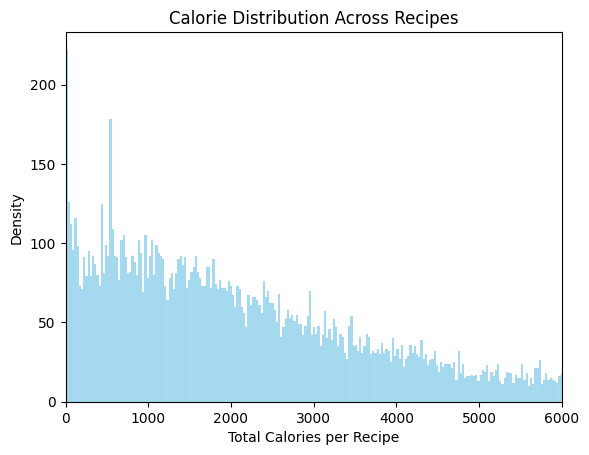

In [62]:
import seaborn as sns
kcal_values = [v['kcal'] for v in cal_dict.values()]
sns.histplot(kcal_values, bins=50000, kde=False, color='skyblue')
plt.xlabel("Total Calories per Recipe")
plt.ylabel("Density")
plt.xlim(0, 6000)
plt.title("Calorie Distribution Across Recipes")
plt.show()
